https://github.com/kaleko/CourseraML/blob/master/ex1/ex1.pdf

ex1data1.txt - Dataset for linear regression with one variable
ex2data2.txt - Dataset for linear regression with multiple variables

### 1. Linear regression with one variable

푸드 트럭의 이익을 예측하기 위해 선형 회귀를 수행한다고 하자.

당신은 새로운 도시에 새 지점을 오픈하려고 하고, 각 도시의 수익과 인구에 대한 데이터가 있다.

당신은 이 데이터를 이용해 어떤 도시로 확장할지를 선택해야 한다.

#### 1-0. Data load

In [36]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [34]:
data1 = pd.read_csv("data1.txt", header= None )
data1.columns = ['Population', 'Profit']
data1.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### 1-1. Plotting the data

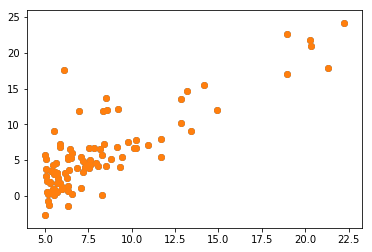

In [38]:
plt.scatter(data1['Population'], data1['Profit'])
plt.show()

#### 1-2. Cost function

선형 회귀의 목적은 비용 함수 $J(\theta)$를 최소화하는 것이다.

여기서는 배치 경사하강법을 통해 파라미터를 학습시켜보자.

또한 추가적으로 $\theta_0$ 절편항을 넣었고, 초기 파라미터 값을 0, 학습률을 0.01로 둔다.

In [39]:
data1['Intercept'] = 1
data1.head(3)

,Population,Profit,Intercept
0,6.1101,17.5920,1
1,5.5277,9.1302,1
2,8.5186,13.6620,1


In [51]:
np.matrix([1,2])

matrix([[1, 2]])

In [92]:
def computeCost(theta, X, Y) :
    theta = np.matrix(theta).reshape(X.shape[1], -1)
    matrix_X = np.matrix([X.loc[i] for i in range(len(X))]).reshape(len(X), -1)
    matrix_Y = np.matrix([Y.loc[i] for i in range(len(Y))]).reshape(len(Y), -1)
    print (   1/(2*len(X))* np.dot( (np.dot(matrix_X, theta) - matrix_Y).T, (np.dot(matrix_X, theta) - matrix_Y)))

    return (   1/(2*len(X))* np.dot( (np.dot(matrix_X, theta) - matrix_Y).T, (np.dot(matrix_X, theta) - matrix_Y)))
          
print(computeCost([0,0], data1[['Intercept', 'Population']], data1['Profit']))

[[ 32.07273388]]
[[ 32.07273388]]


#### 1-3. Gradient Descent

이제 경사하강법을 실제로 구현해보자. 

코드를 짤 때 무엇을 최적화하는지, 그리고 어떤 값들이 업데이트 되는지에 주목하여야 한다.

비용 함수인 $J(\theta)$는 $X$와 $y$가 아니라 $\theta$ 벡터에 의해 파라미터화 된다.

매 단계에서 비용이 줄어들면 올바르게 작동하고 있다는 뜻이 된다.

In [132]:
def batchGradientDescent(initTheta, X, Y) :
    iterate = 1
    alpha = 0.05
    m = len(X)
    theta = np.matrix(initTheta).reshape(X.shape[1], -1)
    
    while(iterate < 1500) : 
        cost = computeCost(theta, X, Y)
        temp = [0, 0]
        matrix_X = np.matrix([X.loc[i] for i in range(len(X))]).reshape(len(X), -1)
        matrix_Y = np.matrix([Y.loc[i] for i in range(len(Y))]).reshape(len(Y), -1)

        for i in range(len(temp)) :
            temp[i] = theta[i] - alpha/m * np.dot( matrix_X[:,i].T, np.dot(matrix_X,theta) - matrix_Y)
        theta[0] = theta[0] - alpha/m * np.dot( matrix_X[:,0].T, np.dot(matrix_X,theta) - matrix_Y)
        theta[1] = theta[1] - alpha/m * np.dot( matrix_X[:,1].T, np.dot(matrix_X,theta) - matrix_Y)
        
        print(theta)
        
        iterate += 1
        
batchGradientDescent([0,0], data1[['Intercept', 'Population']], data1['Profit'])

[[ 32.07273388]]
[[0]
 [3]]
[[ 202.40392734]]
[[ 0]
 [-5]]
[[ 1376.26626788]]
[[ 2]
 [17]]
[[ 10952.10695589]]
[[ -4]
 [-47]]
[[ 94578.58245909]]
[[ 15]
 [141]]
[[ 817299.48851669]]
[[ -42]
 [-412]]
[[ 7078187.41689524]]
[[ 128]
 [1215]]
[[ 61282381.95325556]]
[[ -373]
 [-3574]]
[[  5.31088761e+08]]
[[ 1104]
 [10525]]
[[  4.60351534e+09]]
[[ -3245]
 [-30986]]
[[  3.99070458e+10]]
[[ 9559]
 [91236]]
[[  3.45959559e+11]]
[[ -28142]
 [-268627]]
[[  2.99917254e+12]]
[[ 82862]
 [790934]]
[[  2.60003615e+13]]
[[ -243973]
 [-2328781]]
[[  2.25401768e+14]]
[[ 718345]
 [6856742]]
[[  1.95404826e+15]]
[[ -2115054]
 [-20188625]]
[[  1.69399949e+16]]
[[ 6227456]
 [59442322]]
[[  1.46855860e+17]]
[[ -18335789]
 [-175018825]]
[[  1.27311986e+18]]
[[ 53986931]
 [515316171]]
[[  1.10369049e+19]]
[[ -158956259]
 [-1517269667]]
[[  9.56809134e+19]]
[[ 468022405]
 [4467368536]]
[[  8.29475042e+20]]
[[ -1378020403]
 [-13153483559]]
[[  7.19086828e+21]]
[[ 4057370374]
 [38728421082]]
[[  6.23389301e+22]]
[

[[-4999159877695656960]
 [-9223372036854775808]]
[[  3.85127772e+39]]
[[ -986158326494494208]
 [-9223372036854775808]]
[[  3.53724618e+39]]
[[ 2826193147146610688]
 [-9223372036854775808]]
[[  3.25383272e+39]]
[[ 6447927047105659904]
 [-9223372036854775808]]
[[  2.99805207e+39]]
[[-9223372036854775808]
 [-9223372036854775808]]
[[  4.19923510e+39]]
[[-4999159877695656960]
 [-9223372036854775808]]
[[  3.85127772e+39]]
[[ -986158326494494208]
 [-9223372036854775808]]
[[  3.53724618e+39]]
[[ 2826193147146610688]
 [-9223372036854775808]]
[[  3.25383272e+39]]
[[ 6447927047105659904]
 [-9223372036854775808]]
[[  2.99805207e+39]]
[[-9223372036854775808]
 [-9223372036854775808]]
[[  4.19923510e+39]]
[[-4999159877695656960]
 [-9223372036854775808]]
[[  3.85127772e+39]]
[[ -986158326494494208]
 [-9223372036854775808]]
[[  3.53724618e+39]]
[[ 2826193147146610688]
 [-9223372036854775808]]
[[  3.25383272e+39]]
[[ 6447927047105659904]
 [-9223372036854775808]]
[[  2.99805207e+39]]
[[-92233720368547758

KeyboardInterrupt: 

In [101]:
batchGradientDescent([0,0], data1[['Intercept', 'Population']], data1['Profit'])

[[ 32.07273388]]


ValueError: shapes (97,1) and (2,0) not aligned: 1 (dim 1) != 2 (dim 0)

In [64]:
h([0, 0], matrix_X)

NameError: name 'matrix_X' is not defined

In [ ]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

def computeCost(mytheta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

#Test that running computeCost with 0's as theta returns 32.07:

initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
print computeCost(initial_theta,X,y)


### 1-1. Compute cost for one variable

### 2-2. Compute cost for multiple variables

### 3-1. Gradient Descent for one variable

### 3-2. Gradient Descent for multiple variables

### 4. Normal Equations